# Anomaly Detection

### a. Specifying the data analysis question

Build a model to identify anomiles from the given customer data.

### b. Defining the metric of success
* Actionable insight on the customer data.
* Build a model that detects anomalies in the given data set.





### c. Understanding the context

Anomaly detection (aka outlier analysis) is a step in data mining that identifies data points, events, and/or observations that deviate from a dataset’s normal behavior. Anomalous data can indicate critical incidents, such as a technical glitch, or potential opportunities, for instance a change in consumer behavior. 

Further understanding of anomaly detection and its importance can be found [here](https://www.anodot.com/blog/what-is-anomaly-detection/).


### d. Recording the experimental design

*   Load and preview the data set
*   Clean the data set 
*   Explore the data set and its variables
*   Implement anomaly detection













In [1]:
# load the data set
library(readr)
path<- 'http://bit.ly/CarreFourSalesDataset'
market <- read_csv(path)

Parsed with column specification:
cols(
  Date = col_character(),
  Sales = col_double()
)



In [2]:
# preview first five rows
head(market)

Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255
1/27/2019,489.0480
2/8/2019,634.3785
3/25/2019,627.6165


In [3]:
# preview last five rows
tail(market, 5)

Date,Sales
<chr>,<dbl>
1/29/2019,42.3675
3/2/2019,1022.4900
2/9/2019,33.4320
2/22/2019,69.1110
2/18/2019,649.2990


In [4]:
# Install Lubridate package for date time data
install.packages('lubridate')
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
# convert Date colum to date data type
market$Date <- as.Date(market$Date, "%m/%d/%y")
head(market)

Date,Sales
<date>,<dbl>
2020-01-05,548.9715
2020-03-08,80.2200
2020-03-03,340.5255
2020-01-27,489.0480
2020-02-08,634.3785
2020-03-25,627.6165


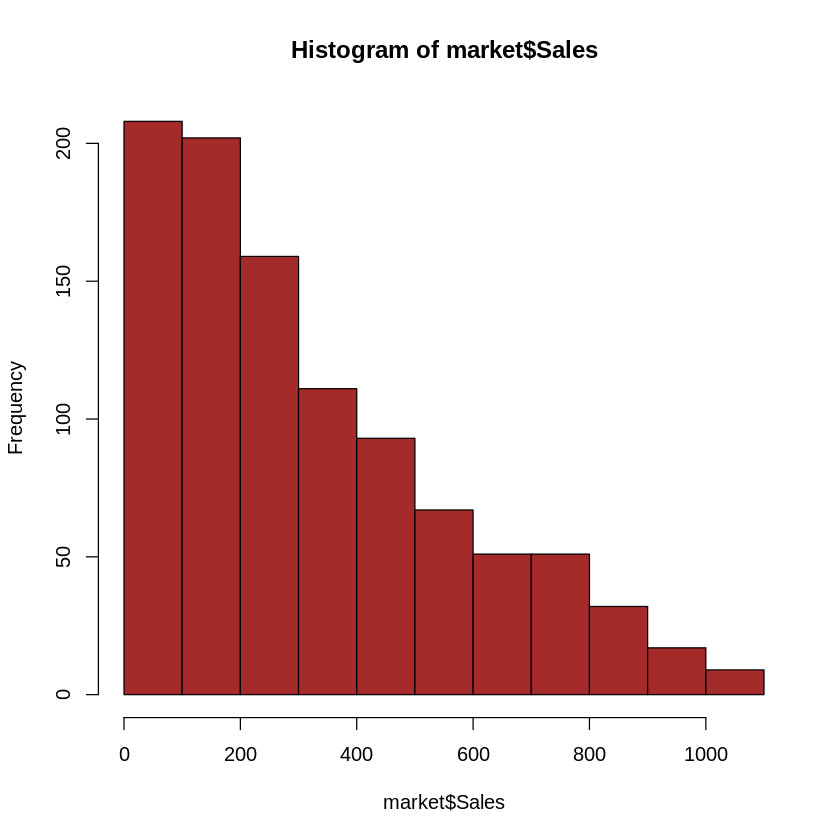

In [6]:
# check 'Sales' distribution
hist(market$Sales, col = 'brown')

In [7]:
# Installing anomalize package
install.packages("anomalize")

# Load tidyverse and anomalize 
library(tidyverse)
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ dplyr   1.0.2
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()

══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [8]:
# sort dates in ascending order
market <- market[order(market$Date),]
head(market, 5)

Date,Sales
<date>,<dbl>
2020-01-01,457.443
2020-01-01,399.756
2020-01-01,470.673
2020-01-01,388.290
2020-01-01,132.762


### Anomalies in Transactions Count

In [9]:
# group and tally the number of transactions per day
market_count <- market %>% group_by(Date) %>% tally()
colnames(market_count) <- c('Date', 'Count')
head(market_count)

Date,Count
<date>,<int>
2020-01-01,12
2020-01-02,8
2020-01-03,8
2020-01-04,6
2020-01-05,12
2020-01-06,9


Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



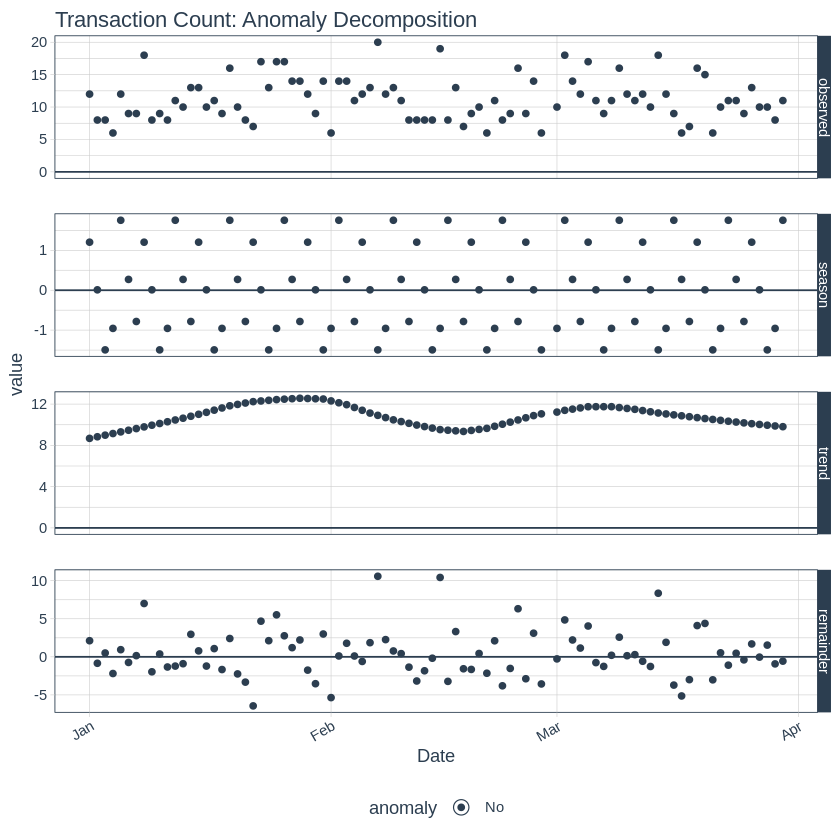

In [10]:
# visualize the data.
market_count %>%
    time_decompose(Count) %>%
    anomalize(remainder) %>%
    plot_anomaly_decomposition() +
    ggtitle("Transaction Count: Anomaly Decomposition")

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days



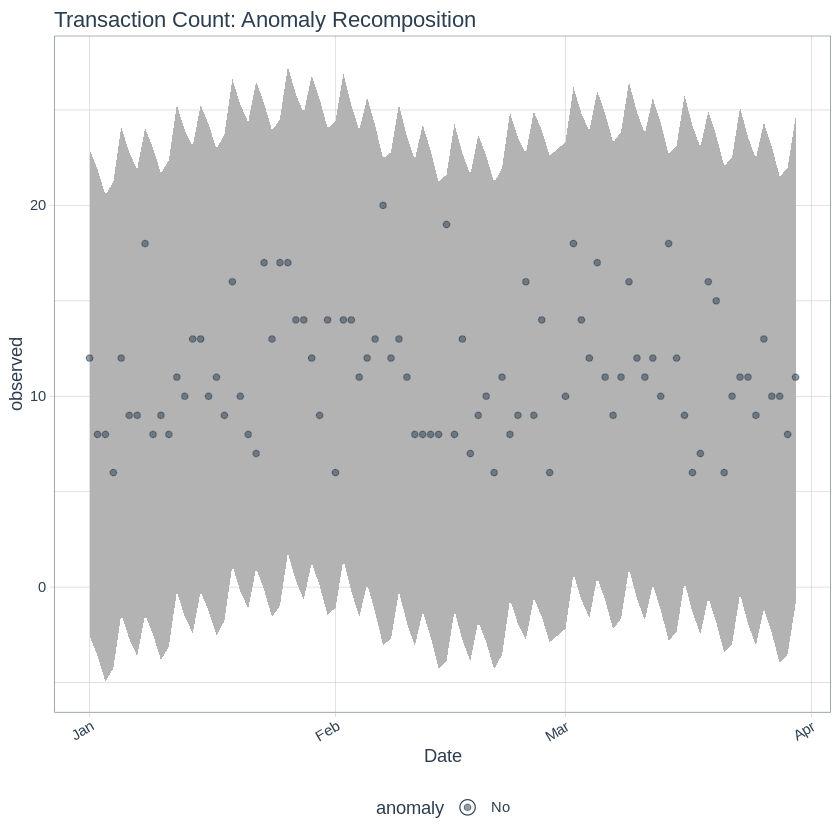

In [11]:
# visualize the data.
market_count %>%
    time_decompose(Count) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5) +
    ggtitle("Transaction Count: Anomaly Recomposition")

There are no anomalies that were detected in the number of transactions done per day between January and April.

## Anomalies in Sales/Day

In [12]:
# group and tally the sum of transactions per day
market_total <- market %>% 
  group_by(Date) %>% 
  summarise(Sales = sum(Sales))

head(market_total)

`summarise()` ungrouping output (override with `.groups` argument)



Date,Sales
<date>,<dbl>
2020-01-01,4745.181
2020-01-02,1945.503
2020-01-03,2078.128
2020-01-04,1623.688
2020-01-05,3536.684
2020-01-06,3614.205


Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days



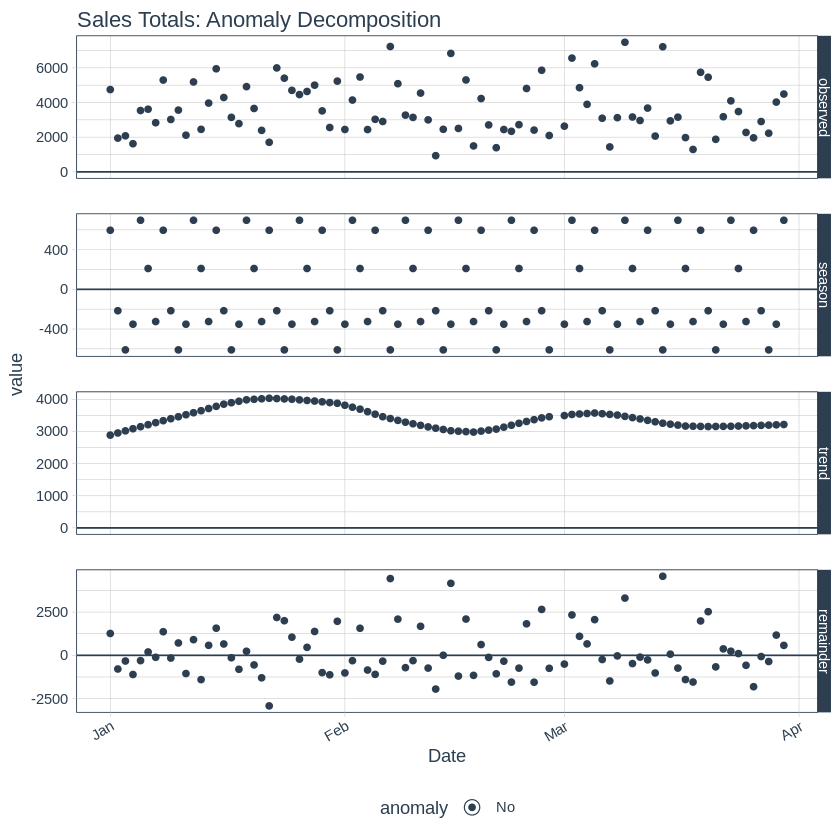

In [13]:
#visualize decomposed anomaly data
market_total %>%
    time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
    anomalize(remainder, method = "iqr", alpha = 0.05, max_anoms = 0.2) %>%
plot_anomaly_decomposition() +
    ggtitle("Sales Totals: Anomaly Decomposition")

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days



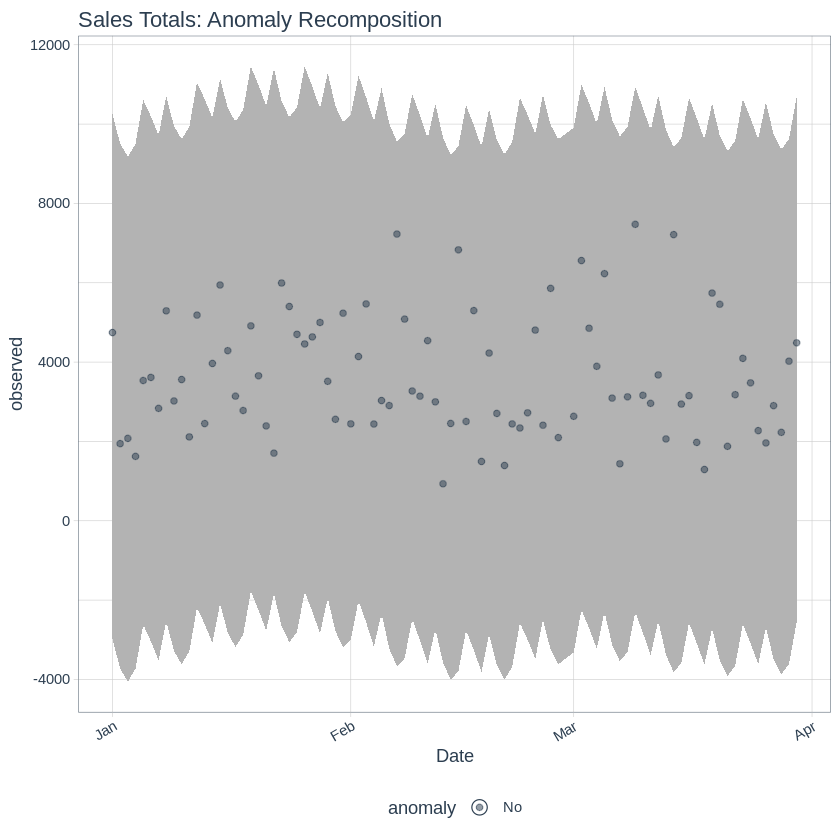

In [14]:
#visualize time recomposed anomaly data.
market_total %>%
    time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
    anomalize(remainder, method = "iqr", alpha = 0.05, max_anoms = 0.2) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5) +
    ggtitle("Sales Totals: Anomaly Recomposition")

There are no anomalies that were detected in the value of transcations done per day between January and April.